In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv("sample_data/training1.csv").dropna()
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0


In [ ]:
df["Classes"].value_counts()

1    138
0    106
Name: Classes, dtype: int64

In [ ]:
x = df.drop("Classes", axis=1)
y = df["Classes"]

Xtrain, Xtest,Ytrain, Ytest = train_test_split(x, y, test_size = 0.2)

In [ ]:
sc=StandardScaler()

scaler = sc.fit(Xtrain)
trainX_scaled = scaler.transform(Xtrain)
testX_scaled = scaler.transform(Xtest)

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(16, 16),
                        max_iter = 50,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(trainX_scaled, Ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(16, 16), max_iter=50)

In [ ]:
y_pred = mlp_clf.predict(testX_scaled)

df_temp = pd.DataFrame({'Actual': Ytest, 'Predicted': y_pred})
df_temp.head(10)

,Actual,Predicted
184,1,1
21,0,0
109,1,1
114,0,0
32,0,0
15,0,0
207,1,1
174,1,1
55,1,1
45,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


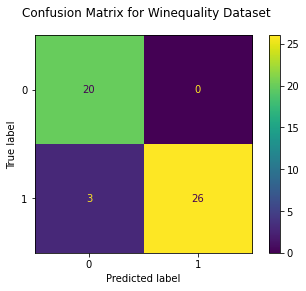

In [ ]:
fig = plot_confusion_matrix(mlp_clf, testX_scaled, Ytest, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for Winequality Dataset")
plt.show()

In [ ]:
print(classification_report(Ytest, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        20
           1       1.00      0.90      0.95        29

    accuracy                           0.94        49
   macro avg       0.93      0.95      0.94        49
weighted avg       0.95      0.94      0.94        49



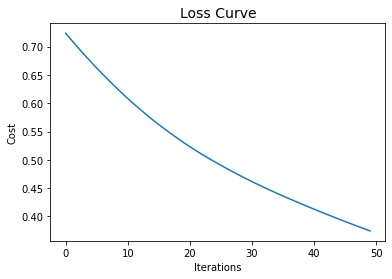

In [ ]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [ ]:
print("Accuracy: {:.2f}%".format(accuracy_score(Ytest, y_pred)*100))

Accuracy: 93.88%


In [ ]:
from sklearn import metrics

In [ ]:
print("Average Error: {:.2f}%".format(metrics.mean_squared_error(Ytest, y_pred)*100))

Average Error: 6.12%


In [ ]:
param_grid = {
    'hidden_layer_sizes': [(20,10,15), (16,16)],
    'max_iter': [50, 30],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)
grid.fit(trainX_scaled, Ytrain)

print(grid.best_params_)

{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (20, 10, 15), 'learning_rate': 'constant', 'max_iter': 50, 'solver': 'adam'}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
grid_predictions = grid.predict(testX_scaled)

print("Accuracy: {:.2f}%".format(accuracy_score(Ytest, grid_predictions)*100))

Accuracy: 93.88%
